<a href="https://colab.research.google.com/github/jeosol/aiml/blob/main/fashion_mnist_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jeosol/aiml.git

Cloning into 'aiml'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 5), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [65]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
import sys
sys.path.append('/content/gdrive/MyDrive/python')

In [67]:
import utils as nn_utils

Several DL concepts applied to the MNIST datasetth

In [52]:
%tensorflow_version 2.x

In [53]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as df
import matplotlib.pyplot as plt

**Load the MNIST data using keras API**

In [36]:
fashion_mnist = keras.datasets.fashion_mnist


In [37]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
# Normalize the data so we get good performance with gradient descent algorithm
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Simple **setup**

In [40]:
# Create the model and add the layers 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [43]:
# run the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid), verbose=0)

In [44]:
# plot the training and validation accuracy and loss
import pandas as pd
df = pd.DataFrame(history.history)

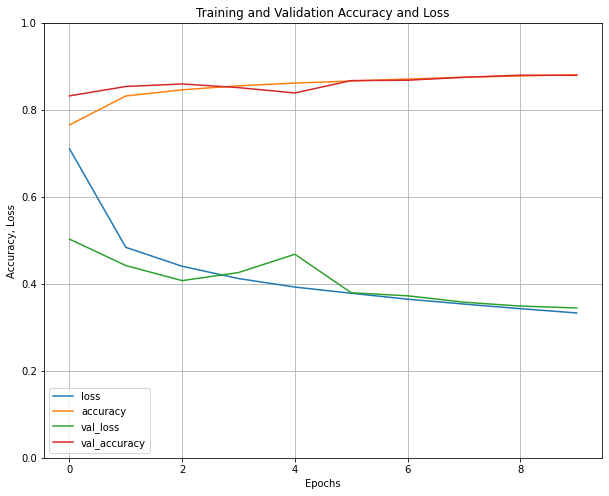

In [45]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,8))
plt.title('Training and Validation Accuracy and Loss')
plt.ylim([0, 1.])
plt.xlabel('Epochs')
plt.ylabel('Accuracy, Loss')
plt.grid(True)


**Using a function to automatically evaluate different NN models**

Using the nn_utils function **create_nn_models** to automatically create different NN architectures (based on number of neurons in the middle layer)and also automatically run the NN models.

Notice that the input layer and output layer are added automatically. The output layer is a Dense layer with softmax activation. 

Basically, the function can run several NN models based on the arguments specified. To run an NN with one hidden layer with 300 neurons, we specify [[300]] as the argument. To run two different NN architectures each with 300 and 200 hidden layers, we pass the arguments [[300], [200]]. Additionally to run the above activations with multiple hidden layers we can specify the following:
[[300, 200, 100], [200, 100, 50]]. This will run two NN models each with 3 hidden layers and the number of specified in the list parameters. Specifically, the first model has 3 dense hidden layers with 300, 200, 100 neurons respectively.

In [69]:
nn_hidden_layer_info = [[300]]
models = nn_utils.run_nn_models(X_train, y_train, X_valid, y_valid, nn_hidden_layer_info)

TypeError: ignored